## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
#importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing






import matplotlib.gridspec as gridspec

In [2]:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV

     |████████████████████████████████| 100 kB 9.8 MB/s 


## Data Understanding

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.isnull().any()

Time      False
V1        False
V2        False
V3         True
V4         True
V5         True
V6         True
V7         True
V8         True
V9         True
V10        True
V11        True
V12        True
V13        True
V14        True
V15        True
V16        True
V17        True
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [6]:
df.fillna(value=0,  inplace=True)

In [7]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [2]:
#Observing the Data

In [9]:
df.shape

(9965, 31)

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,...,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.000000,9965.00000,9965.000000
mean,5934.484897,-0.241681,0.280693,0.906268,0.260221,-0.046337,0.132322,-0.071839,-0.065310,0.801140,...,-0.052094,-0.152076,-0.033423,0.021636,0.087294,0.108317,0.005614,0.003051,62.96204,0.003813
std,4449.407112,1.522695,1.308882,1.156926,1.440430,1.183574,1.307521,1.077818,1.260077,1.156394,...,0.914690,0.631280,0.488178,0.593789,0.428107,0.562634,0.411413,0.266519,184.61852,0.061638
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.00000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412167,-0.615562,-0.643054,-0.630057,-0.542309,-0.190488,0.069062,...,-0.268167,-0.548388,-0.174213,-0.327413,-0.157679,-0.328166,-0.084481,-0.015750,5.00000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943038,0.218442,-0.153014,-0.153463,-0.054279,0.012441,0.804879,...,-0.123068,-0.135905,-0.045987,0.079914,0.121140,0.043375,-0.004486,0.015901,15.95000,0.000000
75%,10163.000000,1.151506,0.900823,1.601870,1.119287,0.371740,0.503269,0.476201,0.273000,1.506002,...,0.032699,0.247881,0.081277,0.410813,0.359406,0.478240,0.121027,0.077402,50.78000,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.43000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9965 non-null   float64
 4   V4      9965 non-null   float64
 5   V5      9965 non-null   float64
 6   V6      9965 non-null   float64
 7   V7      9965 non-null   float64
 8   V8      9965 non-null   float64
 9   V9      9965 non-null   float64
 10  V10     9965 non-null   float64
 11  V11     9965 non-null   float64
 12  V12     9965 non-null   float64
 13  V13     9965 non-null   float64
 14  V14     9965 non-null   float64
 15  V15     9965 non-null   float64
 16  V16     9965 non-null   float64
 17  V17     9965 non-null   float64
 18  V18     9965 non-null   float64
 19  V19     9965 non-null   float64
 20  V20     9965 non-null   float64
 21  V21     9965 non-null   float64
 22  

## Exploratory data analytics (EDA)

For the current data set, because Gaussian variables are used, we do not need to perform Z-scaling. However, we will check  if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.

Here we will observe the distribution of our classes

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100




In [13]:
print (normal_share)
print (fraud_share)

99.61866532865028
0.38133467134972404


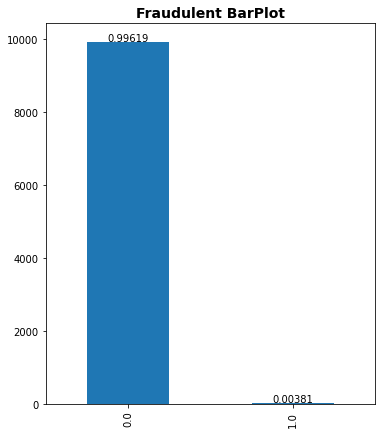

In [14]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title('Fraudulent BarPlot', fontweight='bold',fontsize=14)
ax = df['Class'].value_counts().plot(kind='bar')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.5f}'.format(height/total),
            ha="center")



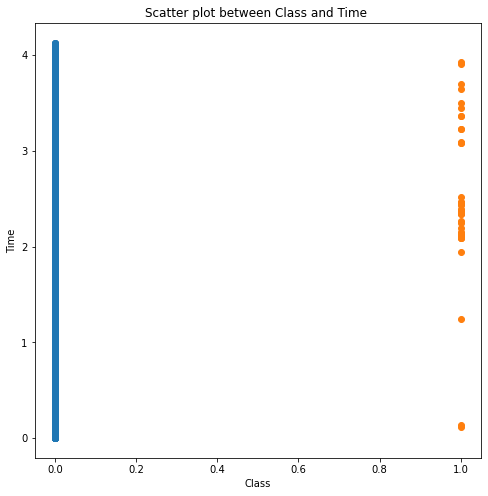

In [15]:
# Create a scatter plot to observe the distribution of classes with time
df_nonfraud = df[df.Class == 0]
df_fraud = df[df.Class == 1]

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Class , df_nonfraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Class, df_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Class')
plt.ylabel('Time')
plt.title('Scatter plot between Class and Time ')
plt.show()


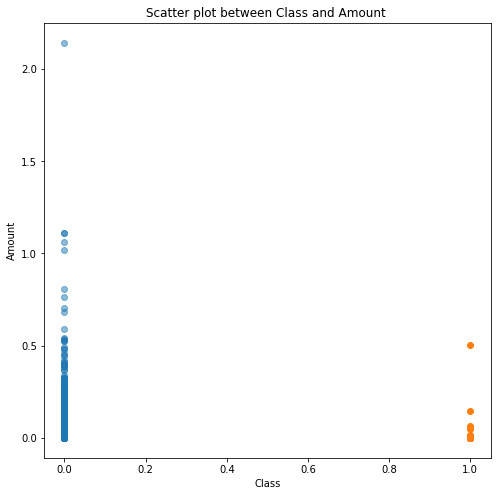

In [16]:
# Create a scatter plot to observe the distribution of classes with Amount

fig = plt.figure(figsize = (8,8))
plt.scatter(df_nonfraud.Class , df_nonfraud.Amount.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(df_fraud.Class, df_fraud.Amount.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Scatter plot between Class and Amount ')
plt.show()


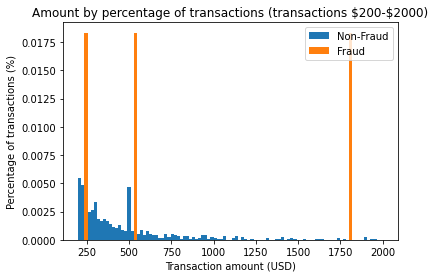

In [17]:
# Plot of high value transactions($200-$2000)

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

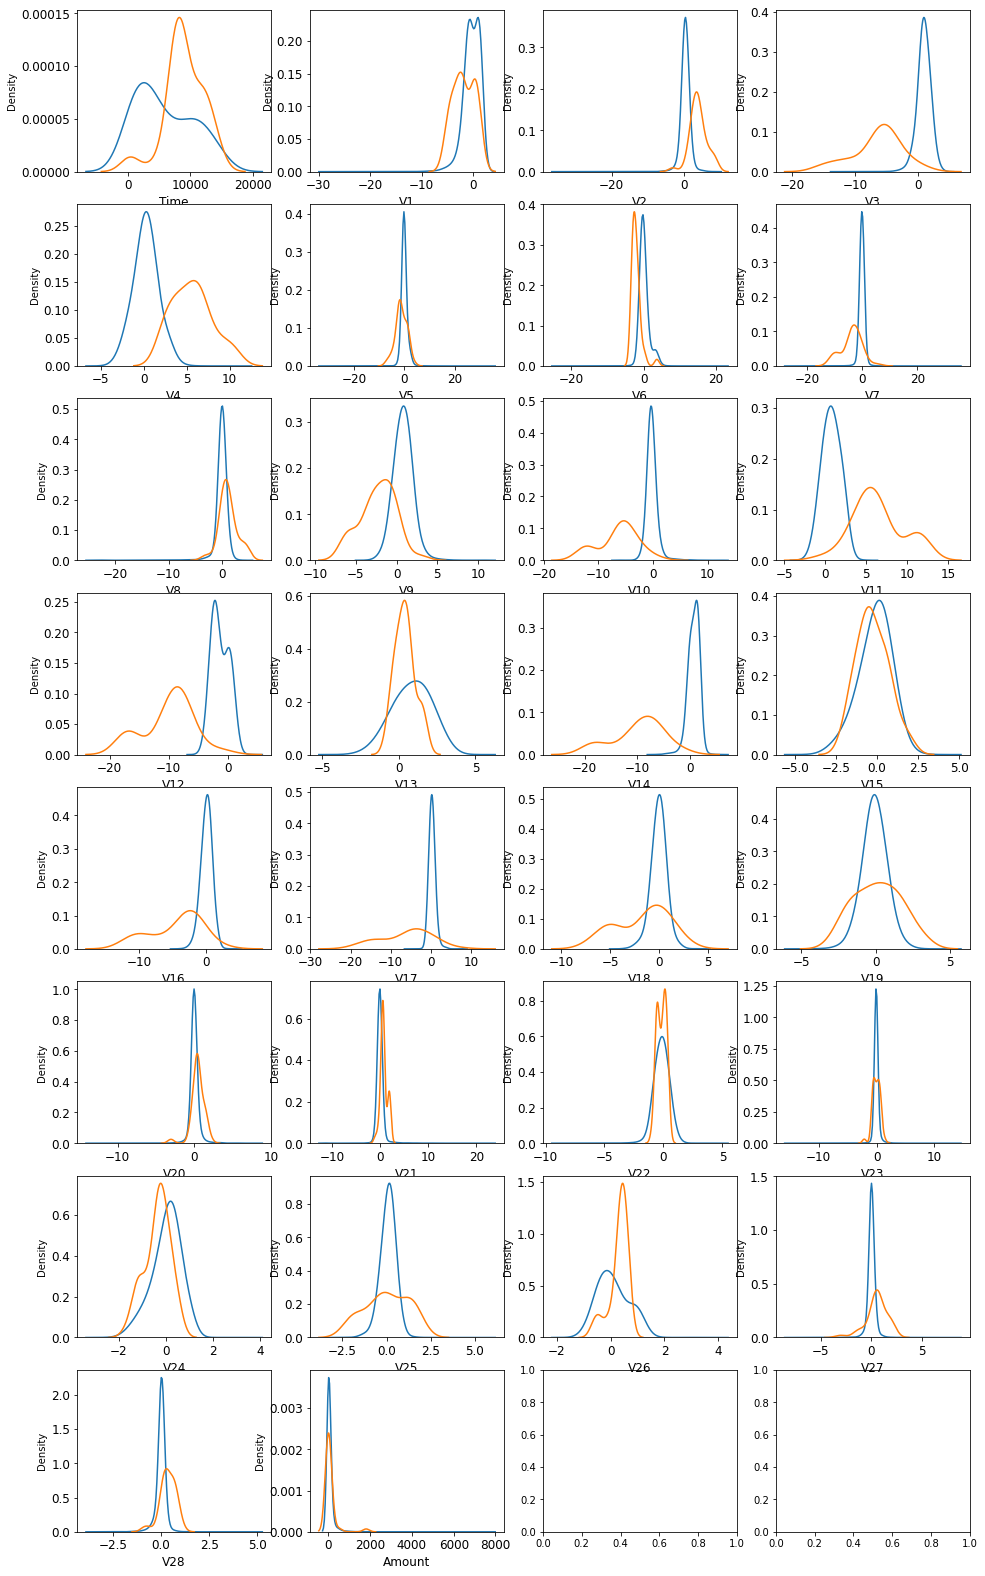

In [18]:
# Plotting all the variable to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [3]:
#Creating a correlation map of all the variables

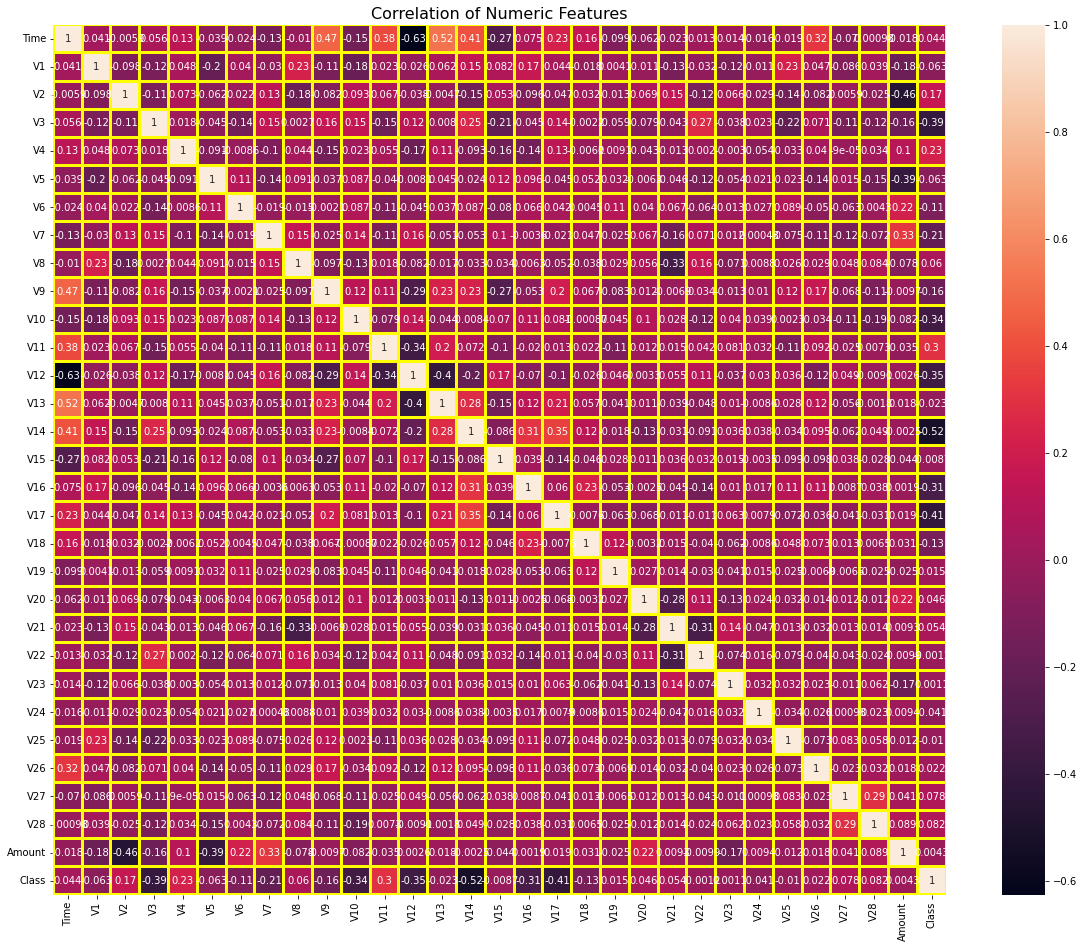

In [19]:
f , ax = plt.subplots(figsize = (20,16))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(df.corr(),linewidths=2, linecolor='yellow', vmax =1,annot= True)
plt.show()

Dropping the Columns that are not needed

In [20]:
# Drop unnecessary columns

df = df.drop('Time', axis =1, inplace=False)

In [21]:
df = df.drop('Amount',axis = 1, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9965 non-null   float64
 1   V2      9965 non-null   float64
 2   V3      9965 non-null   float64
 3   V4      9965 non-null   float64
 4   V5      9965 non-null   float64
 5   V6      9965 non-null   float64
 6   V7      9965 non-null   float64
 7   V8      9965 non-null   float64
 8   V9      9965 non-null   float64
 9   V10     9965 non-null   float64
 10  V11     9965 non-null   float64
 11  V12     9965 non-null   float64
 12  V13     9965 non-null   float64
 13  V14     9965 non-null   float64
 14  V15     9965 non-null   float64
 15  V16     9965 non-null   float64
 16  V17     9965 non-null   float64
 17  V18     9965 non-null   float64
 18  V19     9965 non-null   float64
 19  V20     9965 non-null   float64
 20  V21     9965 non-null   float64
 21  V22     9965 non-null   float64
 22  

### Splitting the data into train & test data

In [22]:
X = df.drop(['Class'],axis = 1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [23]:
y = df['Class']

In [24]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
X.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn import model_selection


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)



##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
print(np.sum (X_test))

V1     -504.765350
V2      569.672849
V3     1788.216248
V4      543.103515
V5     -110.939687
V6      262.820215
V7     -190.953163
V8     -160.432169
V9     1591.700308
V10    -425.317883
V11    1552.307440
V12   -2476.951107
V13    1707.931370
V14    1427.425614
V15    -230.271567
V16     -25.870432
V17     669.076140
V18     -66.372439
V19    -179.103672
V20      96.049846
V21     -96.435416
V22    -261.506106
V23     -94.456908
V24      11.809331
V25     170.266364
V26     224.033892
V27      35.767596
V28      10.183146
dtype: float64


In [29]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))


38.0
29.0
9.0


### Plotting the distribution of a variable

In [30]:
cols = list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

We observe the skewness of the data befor Preprocesing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

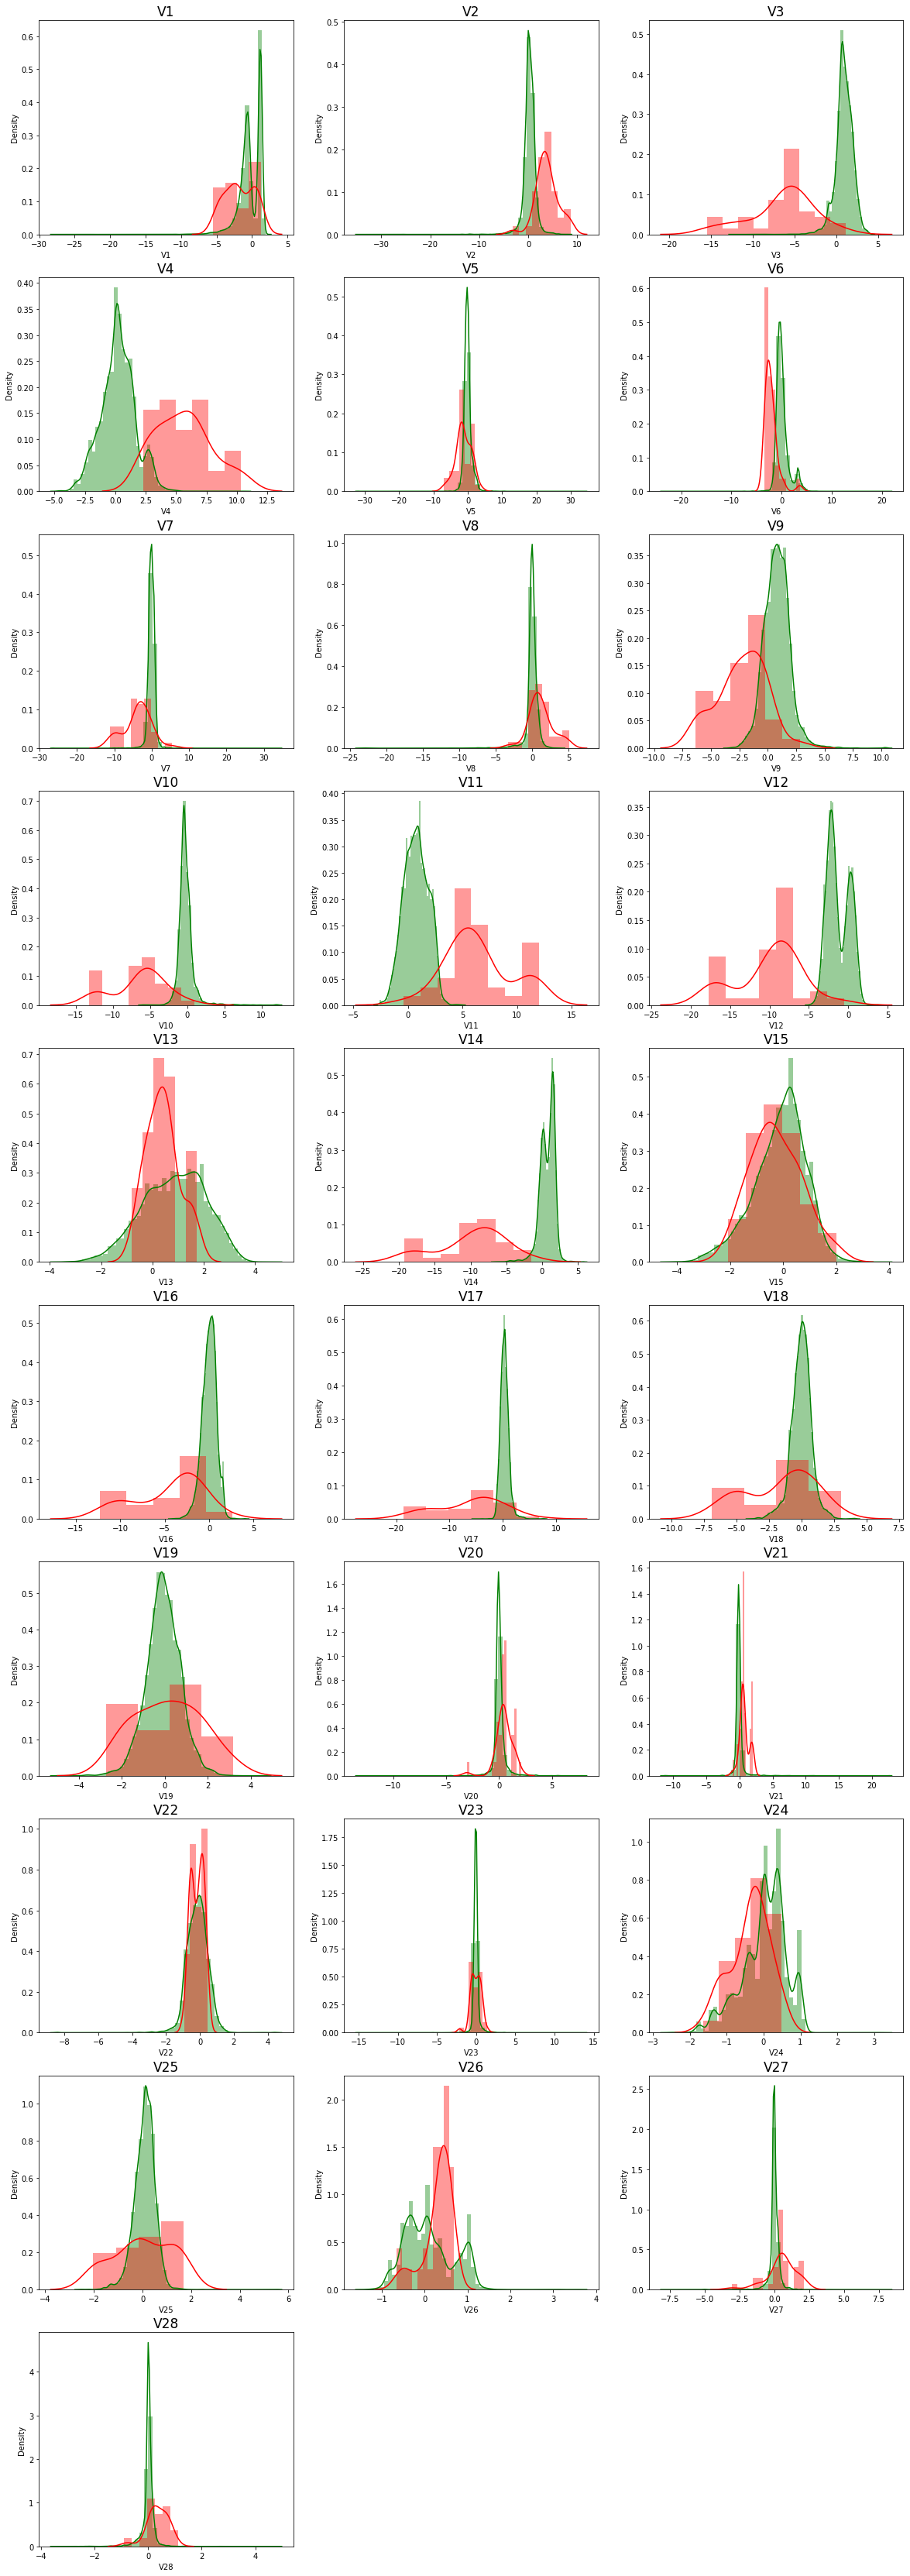

In [31]:
# plot the histogram of a variable from the dataset to see the skewness


plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][df.Class == 0], color='green')
  sns.distplot(X[col][df.Class == 1], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [32]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

In [33]:
pt = preprocessing.PowerTransformer(copy=False)
PWTR_X = pt.fit_transform(X)
                      ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

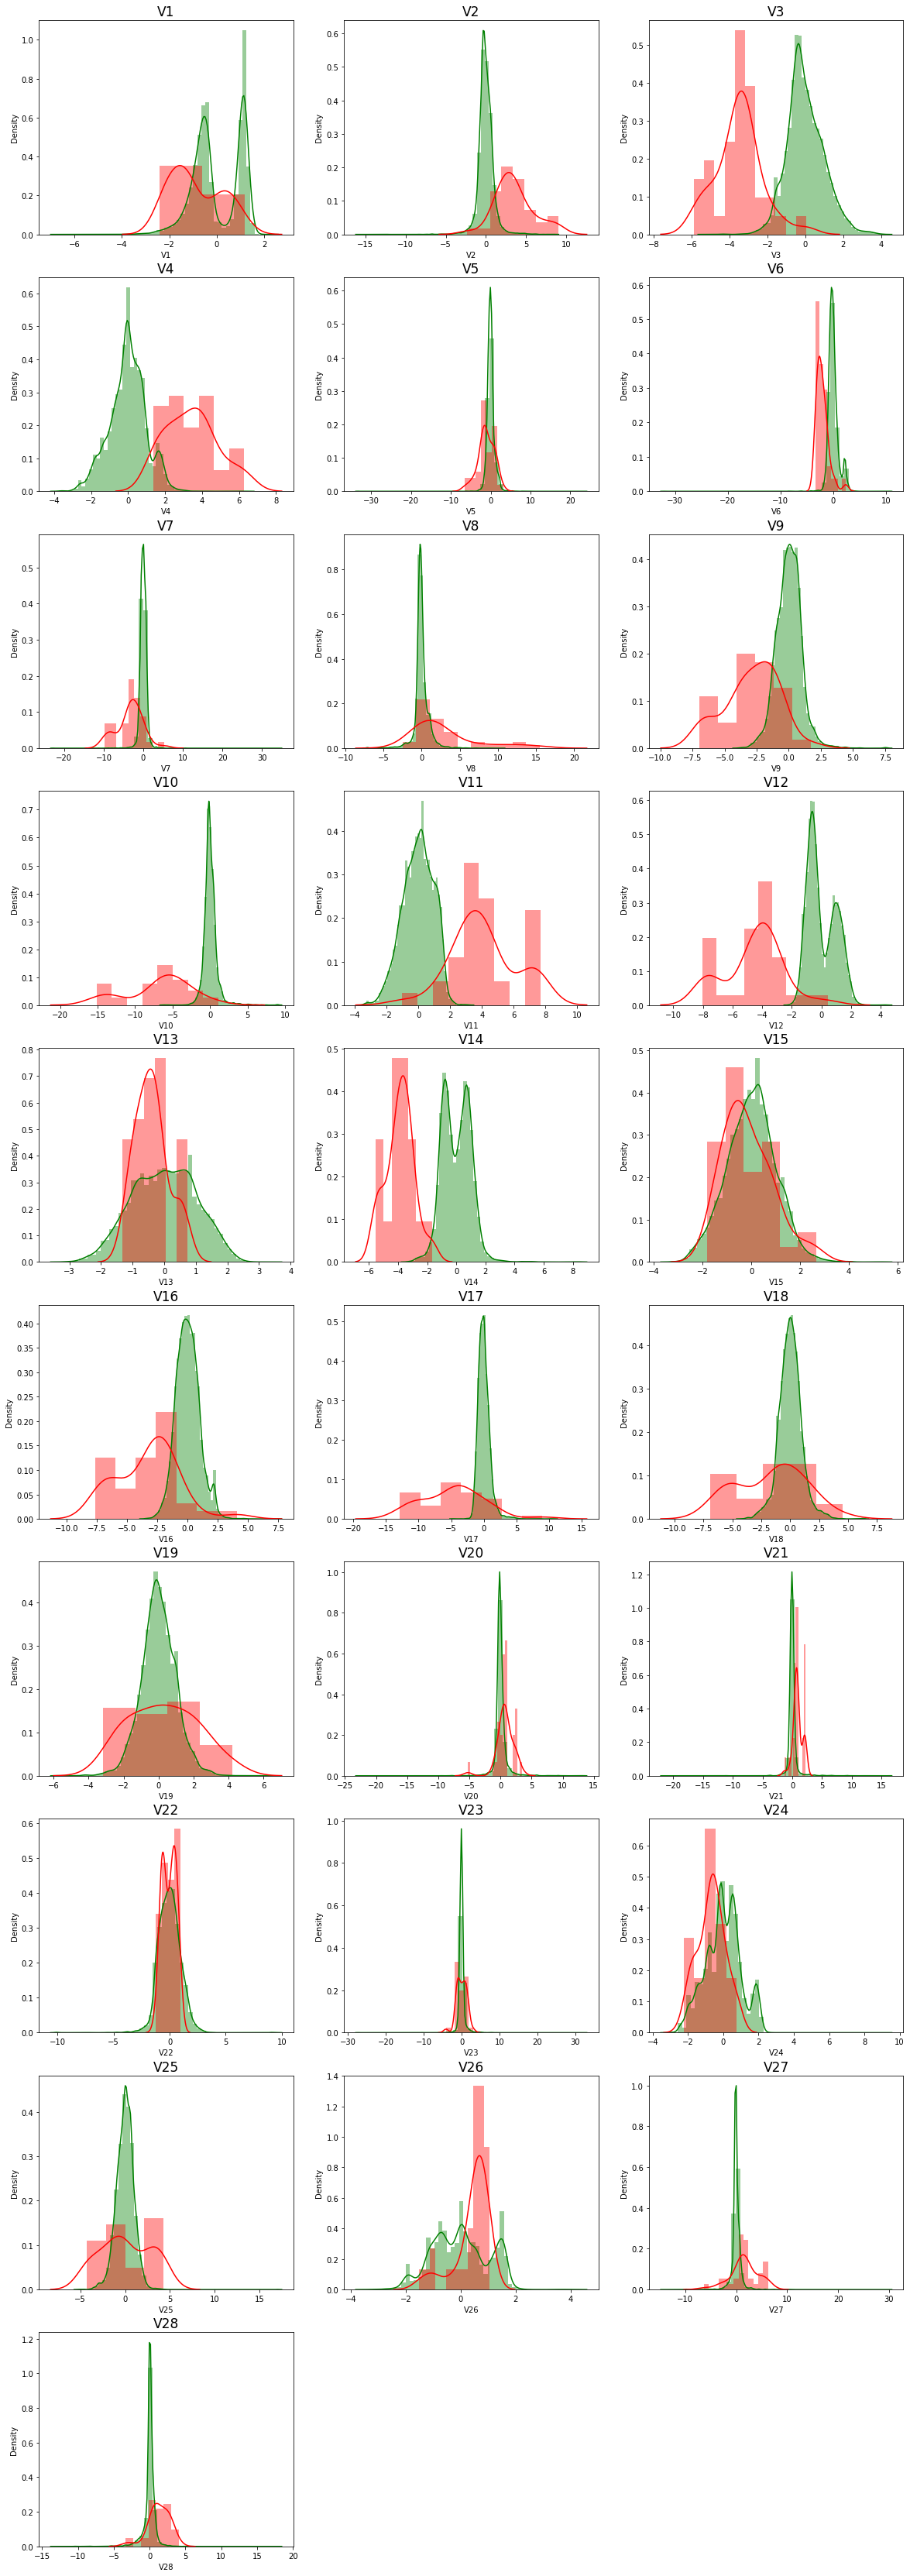

In [34]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][df.Class == 0], color='green')
  sns.distplot(X[col][df.Class == 1], color='red')
  plt.title(col, fontsize=17)
plt.show()

The skewness of the data has reduced to some extent to make the distribution more gaussian

In [35]:
print(np.sum (y))

38.0


## Model Building
- Build different models on the imbalanced dataset and see the result

We are going to build the following Models to see which one fits the best on the Imbalanced Data befor we balance the data:
Logistic Regression on Imbalanced Data
Random Forest on Imbalanced Data
XGBoost on Imbalanced Data
Random Forest on Imbalanced Data 
KNN Model on Imbalanced Data

# Logestic Regression Model with Imbalanced Data

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn.model_selection import KFold 
# Fit a logistic regression model to our data
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  1.0
Best hyperparameters:  {'C': 0.1}


In [39]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029272,0.001669,0.005372,0.000101,0.01,{'C': 0.01},1.0,0.999895,1.0,1.0,...,0.999979,4.195511e-05,6,0.999979,0.999993,0.999993,1.0,0.999993,0.999992,6.696670e-06
1,0.034107,0.002106,0.005173,0.000051,0.1,{'C': 0.1},1.0,1.000000,1.0,1.0,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,7.021667e-17
2,0.044772,0.003214,0.005624,0.000241,1,{'C': 1},1.0,1.000000,1.0,1.0,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,4.965068e-17
3,0.058724,0.008572,0.007468,0.003332,10,{'C': 10},1.0,1.000000,1.0,1.0,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000e+00
4,0.062082,0.005987,0.005781,0.000133,100,{'C': 100},1.0,1.000000,1.0,1.0,...,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000e+00
5,0.056625,0.007257,0.005191,0.000968,1000,{'C': 1000},1.0,1.000000,1.0,1.0,...,1.000000,4.965068e-17,1,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000e+00


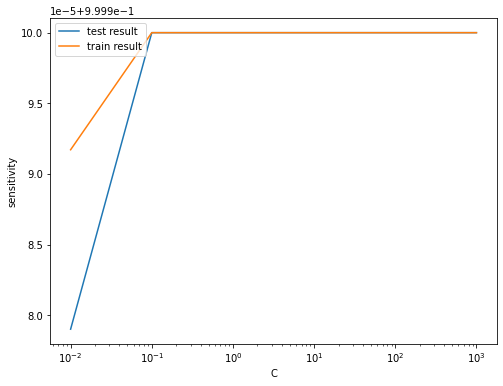

In [40]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [41]:
# Instantiating the model with best C
logreg_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [43]:
# Predictions on the train set
y_train_pred = model_cv.predict(X_train)

In [44]:
display_scores(y_train, y_train_pred)

F1 Score: 96.43%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      0.93      0.96        29

    accuracy                           1.00      7972
   macro avg       1.00      0.97      0.98      7972
weighted avg       1.00      1.00      1.00      7972



In [45]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [46]:
# Predicted probability
y_train_pred_proba = logreg_model.predict_proba(X_train)[:,1]

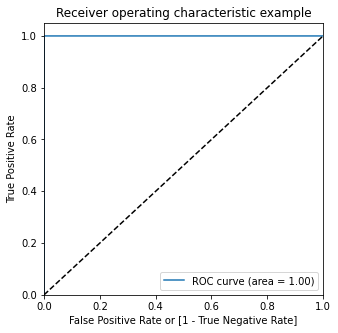

In [47]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [48]:
# Making prediction on the test set
y_test_pred = logreg_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.43%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.56      0.71         9

    accuracy                           1.00      1993
   macro avg       1.00      0.78      0.86      1993
weighted avg       1.00      1.00      1.00      1993



In [49]:
# Predicted probability
y_test_pred_proba = logreg_model.predict_proba(X_test)[:,1]

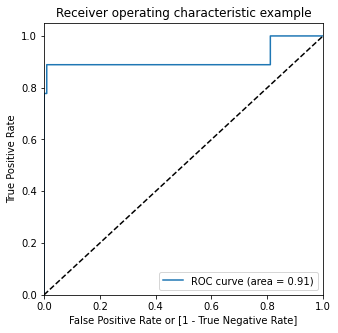

In [50]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary

Train set 

 F1-score : 96.43%
 ROC curve : 1

Test set

 F1-score : 71.43%
 ROC curve : .91

## Descission Tree

In [52]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [53]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046364,0.015474,0.006019,0.000311,50,50,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.995279,0.940668,0.946033,0.960660,0.024577,3
1,0.044054,0.013266,0.005407,0.000069,100,50,5,"{'min_samples_split': 100, 'min_samples_leaf':...",0.996979,0.940668,0.946033,0.961227,0.025375,1
2,0.052044,0.022315,0.005560,0.000017,50,100,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.941786,0.937269,0.940744,0.939933,0.001931,8
3,0.041657,0.011993,0.005918,0.000302,100,100,5,"{'min_samples_split': 100, 'min_samples_leaf':...",0.990710,0.937269,0.940744,0.956241,0.024414,6
4,0.044685,0.015959,0.005706,0.000354,50,50,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.995279,0.940668,0.946033,0.960660,0.024577,3
5,0.041492,0.012835,0.005657,0.000069,100,50,10,"{'min_samples_split': 100, 'min_samples_leaf':...",0.996979,0.940668,0.946033,0.961227,0.025375,1
6,0.041540,0.012153,0.005864,0.000232,50,100,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.991314,0.938025,0.940744,0.956694,0.024505,5
7,0.042190,0.013356,0.005855,0.000227,100,100,10,"{'min_samples_split': 100, 'min_samples_leaf':...",0.990181,0.937269,0.940744,0.956065,0.024166,7


In [54]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9612267021820332
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [55]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [56]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 0.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       0.00      0.00      0.00        29

    accuracy                           1.00      7972
   macro avg       0.50      0.50      0.50      7972
weighted avg       0.99      1.00      0.99      7972



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


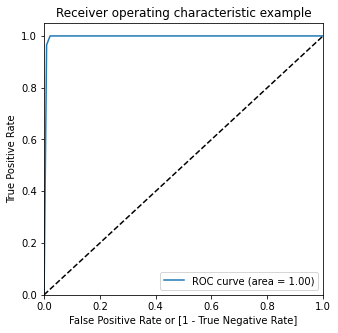

In [57]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [58]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 0.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       0.00      0.00      0.00         9

    accuracy                           1.00      1993
   macro avg       0.50      0.50      0.50      1993
weighted avg       0.99      1.00      0.99      1993



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


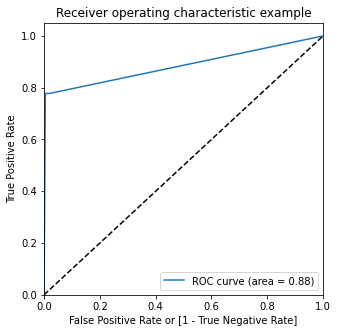

In [59]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 95.43% ROC curve : 1

Test set

F1-score : 86.43% ROC curve : .88

# XGBoost

In [61]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions= param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [62]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.598030,0.055609,0.008329,0.002072,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",1.0,1.0,0.999962,0.999987,0.000018,1,1.0,1.0,1.0,1.0,0.0
1,0.679673,0.004768,0.006892,0.000124,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",1.0,1.0,0.999962,0.999987,0.000018,3,1.0,1.0,1.0,1.0,0.0
2,0.648168,0.008577,0.006890,0.000060,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",1.0,1.0,0.999887,0.999962,0.000053,5,1.0,1.0,1.0,1.0,0.0
3,0.519915,0.002891,0.006557,0.000253,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",1.0,1.0,0.999962,0.999987,0.000018,1,1.0,1.0,1.0,1.0,0.0
4,0.595225,0.002136,0.006335,0.000054,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",1.0,1.0,0.999943,0.999981,0.000027,4,1.0,1.0,1.0,1.0,0.0
5,0.536061,0.002693,0.006325,0.000016,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",1.0,1.0,0.999679,0.999893,0.000151,6,1.0,1.0,1.0,1.0,0.0


In [63]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999874071275658
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.3)


In [64]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [65]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

In [66]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00      7972
   macro avg       1.00      1.00      1.00      7972
weighted avg       1.00      1.00      1.00      7972



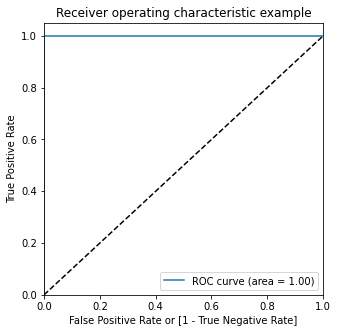

In [67]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [68]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



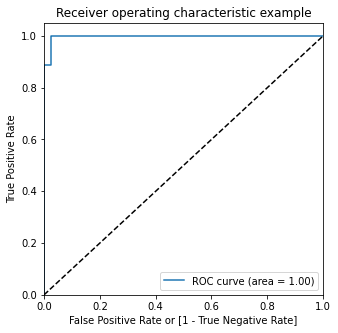

In [69]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [69]:
Model summary
Train set

F1-score : 100% ROC curve : 1

Test set

F1-score : 87.5% ROC curve : 1

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [70]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# KNN 

In [71]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits


ValueError: ignored

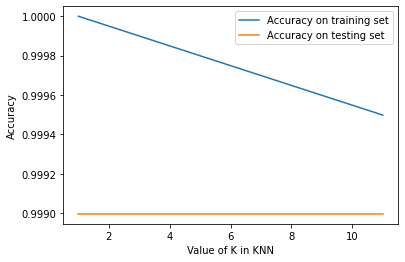

In [75]:
k_range = [1,11]
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score1.append(knn.score(X_train,y_train))
    score2.append(knn.score(X_test,y_test))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'Accuracy on training set')
plt.plot(k_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()


from sklearn.model_selection import KFold 
# Fit a logistic regression model to our data
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

In [76]:
from sklearn.model_selection import KFold 
# Fit a logistic regression model to our data
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=k),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 


In [78]:
# Instantiating the model with best C
knn_model = KNeighborsClassifier(n_neighbors=13)

# Fitting the model on train dataset
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [79]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [81]:
# Predictions on the train set
y_train_pred = knn_model.predict(X_train)

In [82]:
display_scores(y_train, y_train_pred)

F1 Score: 90.57%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      0.83      0.91        29

    accuracy                           1.00      7972
   macro avg       1.00      0.91      0.95      7972
weighted avg       1.00      1.00      1.00      7972



In [83]:
# Predicted probability
y_train_pred_proba = knn_model.predict_proba(X_train)[:,1]

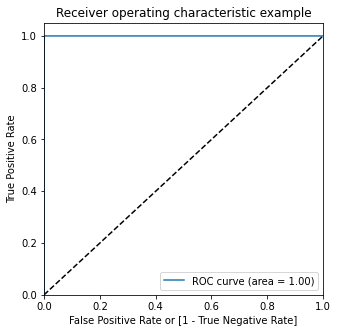

In [84]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [86]:
# Making prediction on the test set
y_test_pred = knn_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 80.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.67      0.80         9

    accuracy                           1.00      1993
   macro avg       1.00      0.83      0.90      1993
weighted avg       1.00      1.00      1.00      1993



In [88]:
# Predicted probability
y_test_pred_proba = knn_model.predict_proba(X_test)[:,1]

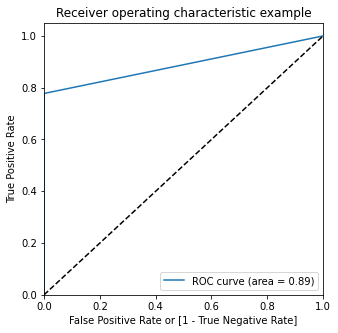

In [89]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 90.57% ROC curve : 1

Test set

F1-score : 80% ROC curve : .89

# Random Forest 

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [106]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# creating a KFold object 
folds = 3

        


# specify model
rf_model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, 
                               criterion='entropy',
                               max_depth=10, 
                               min_samples_leaf=10, 
                               n_estimators=20, 
                               n_jobs=-1, 
                               random_state=5)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rf_model, 
                        param_grid= param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 12},
                                              criterion='entropy', max_depth=10,
                                              min_samples_leaf=10,
                                              n_estimators=20, n_jobs=-1,
                                              random_state=5),
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [107]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046364,0.015474,0.006019,0.000311,50,50,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.995279,0.940668,0.946033,0.960660,0.024577,3
1,0.044054,0.013266,0.005407,0.000069,100,50,5,"{'min_samples_split': 100, 'min_samples_leaf':...",0.996979,0.940668,0.946033,0.961227,0.025375,1
2,0.052044,0.022315,0.005560,0.000017,50,100,5,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.941786,0.937269,0.940744,0.939933,0.001931,8
3,0.041657,0.011993,0.005918,0.000302,100,100,5,"{'min_samples_split': 100, 'min_samples_leaf':...",0.990710,0.937269,0.940744,0.956241,0.024414,6
4,0.044685,0.015959,0.005706,0.000354,50,50,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.995279,0.940668,0.946033,0.960660,0.024577,3
5,0.041492,0.012835,0.005657,0.000069,100,50,10,"{'min_samples_split': 100, 'min_samples_leaf':...",0.996979,0.940668,0.946033,0.961227,0.025375,1
6,0.041540,0.012153,0.005864,0.000232,50,100,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.991314,0.938025,0.940744,0.956694,0.024505,5
7,0.042190,0.013356,0.005855,0.000227,100,100,10,"{'min_samples_split': 100, 'min_samples_leaf':...",0.990181,0.937269,0.940744,0.956065,0.024166,7


In [108]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9612267021820332
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [109]:
rf_model= RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 12}, criterion='entropy',
                       max_depth=10, min_samples_leaf=10, n_estimators=20,
                       n_jobs=-1, random_state=5)

In [110]:
y_train_pred = rf_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 98.25%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      0.97      0.98        29

    accuracy                           1.00      7972
   macro avg       1.00      0.98      0.99      7972
weighted avg       1.00      1.00      1.00      7972



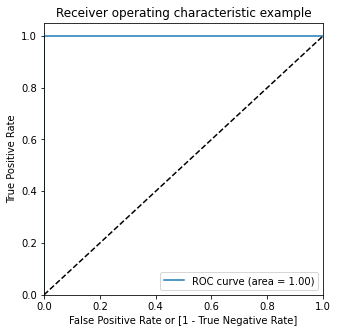

In [111]:
# Predicted probability
y_train_pred_proba = rf_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [112]:
y_test_pred = rf_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



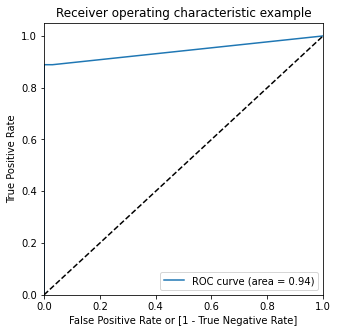

In [113]:
# Predicted probability
y_test_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 98.25% ROC curve : 87.5

Test set

F1-score : 1% ROC curve : .94

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [116]:
clf = XGBClassifier(max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print the evaluation score on the X_test by choosing the best evaluation metric
print("Training:"+str(clf.score(X_train,y_train)))
print("Test:"+str(clf.score(X_test,y_test)))
pred = clf.predict(X_test)

Training:1.0
Test:0.9989964877069744


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 12
2nd Top var = 11
3rd Top var = 10


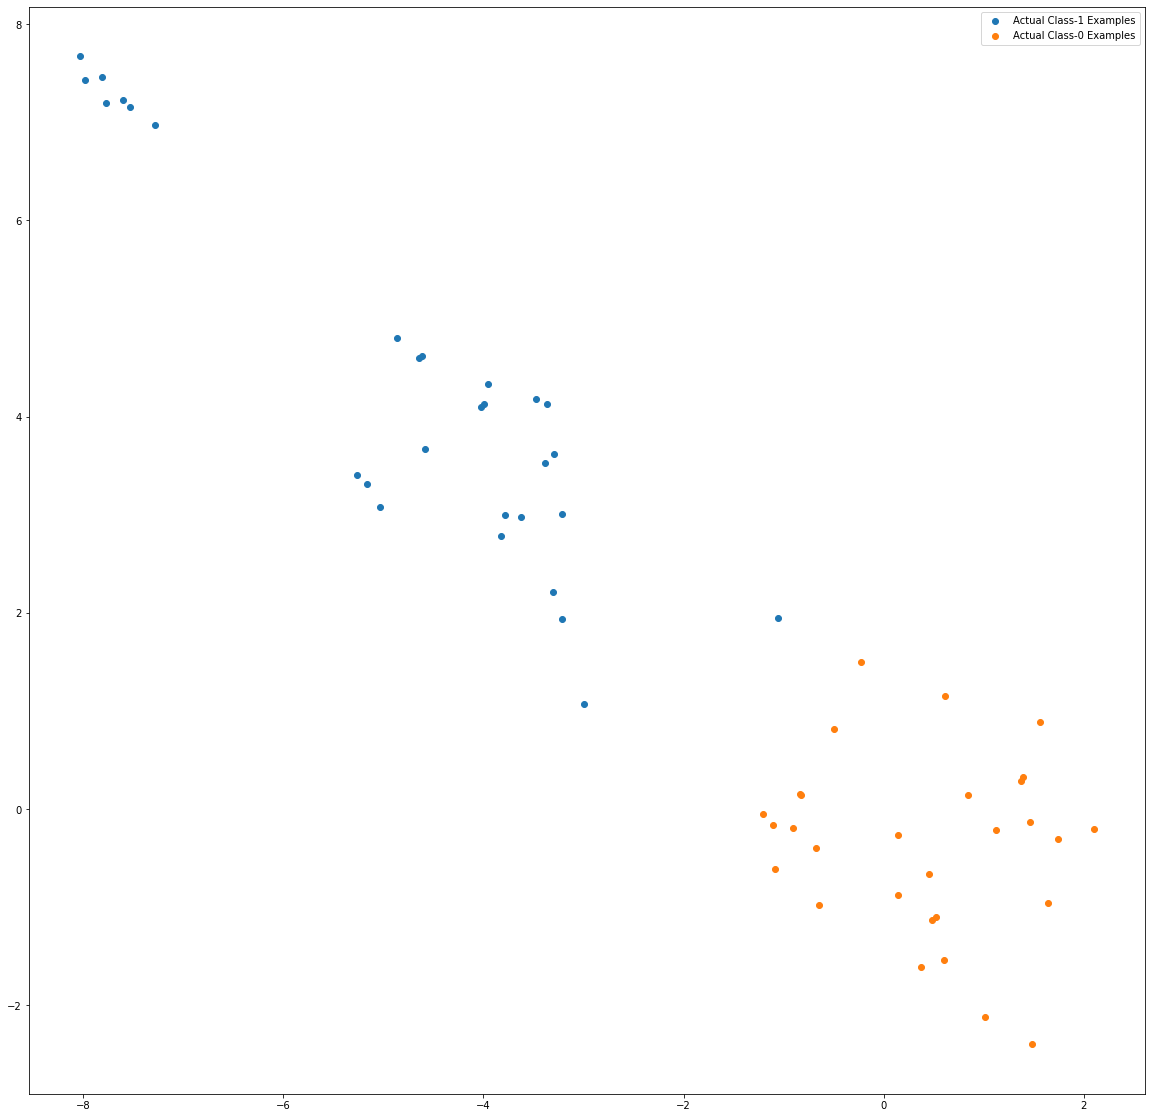

In [117]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [118]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [119]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0.0: 7943, 1.0: 29})
New class distribution:- Counter({0.0: 7943, 1.0: 7943})


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#Logistic Regrassion with Random Oversampling

In [120]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  1.0
Best hyperparameters:  {'C': 0.01}


In [121]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069392,0.006727,0.006616,0.000426,0.01,{'C': 0.01},1.0,1.0,1.0,1.000000,...,1.000000,0.000000e+00,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
1,0.079492,0.011236,0.006096,0.000569,0.1,{'C': 0.1},1.0,1.0,1.0,1.000000,...,1.000000,4.965068e-17,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,0.096453,0.011212,0.005453,0.000058,1,{'C': 1},1.0,1.0,1.0,0.999720,...,0.999944,1.121240e-04,3,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
3,0.133293,0.015679,0.005459,0.000135,10,{'C': 10},1.0,1.0,1.0,0.999692,...,0.999938,1.233999e-04,4,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
4,0.137229,0.019545,0.005467,0.000046,100,{'C': 100},1.0,1.0,1.0,0.999649,...,0.999930,1.403932e-04,5,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
5,0.120663,0.013872,0.005425,0.000066,1000,{'C': 1000},1.0,1.0,1.0,0.999605,...,0.999921,1.578630e-04,6,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00


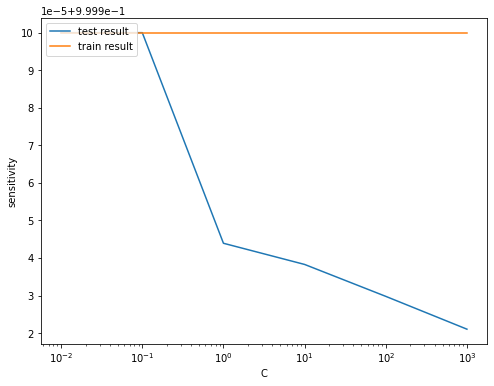

In [122]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [123]:
model_cv.best_params_

{'C': 0.01}

In [124]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

In [125]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [126]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



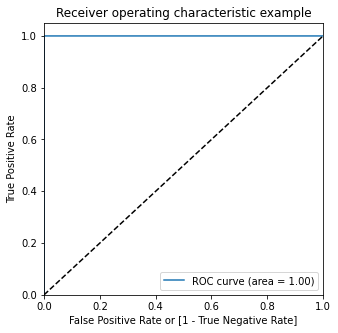

In [127]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [128]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



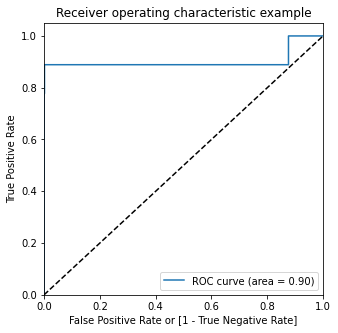

In [129]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Descision Tree with over sampeling

In [130]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [131]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9999682362084755
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [132]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [133]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.9%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



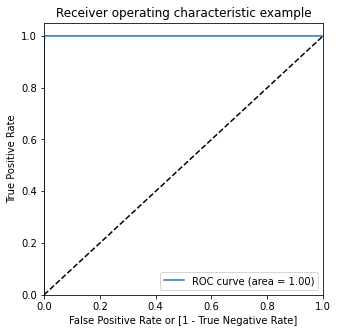

In [134]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [135]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 78.26%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       0.64      1.00      0.78         9

    accuracy                           1.00      1993
   macro avg       0.82      1.00      0.89      1993
weighted avg       1.00      1.00      1.00      1993



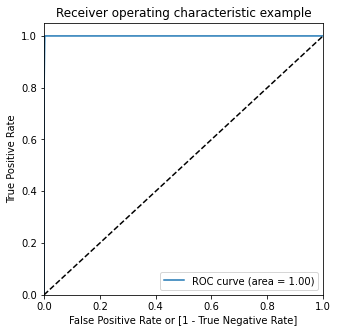

In [136]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# XGBoost with Random Oversampling

In [138]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions= param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [139]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.827451,0.156907,0.017110,0.000165,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",1.0,1.0,1.0,1.0,0.000000e+00,1,1.0,1.0,1.0,1.0,9.064933e-17
1,2.144461,0.095234,0.028421,0.015014,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",1.0,1.0,1.0,1.0,0.000000e+00,1,1.0,1.0,1.0,1.0,1.281975e-16
2,1.480338,0.299517,0.012900,0.003107,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",1.0,1.0,1.0,1.0,0.000000e+00,1,1.0,1.0,1.0,1.0,0.000000e+00
3,1.017746,0.002963,0.009802,0.000070,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",1.0,1.0,1.0,1.0,0.000000e+00,1,1.0,1.0,1.0,1.0,0.000000e+00
4,1.161881,0.003447,0.009582,0.000105,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",1.0,1.0,1.0,1.0,6.409876e-17,1,1.0,1.0,1.0,1.0,0.000000e+00
5,1.025020,0.013489,0.010213,0.000580,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",1.0,1.0,1.0,1.0,0.000000e+00,1,1.0,1.0,1.0,1.0,0.000000e+00


In [140]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  1.0
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.3)


In [141]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [142]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [143]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



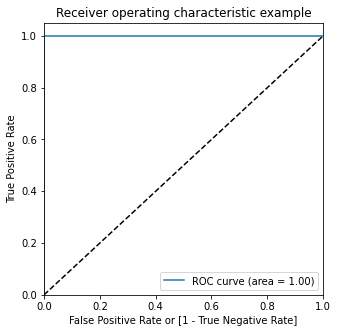

In [144]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [145]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



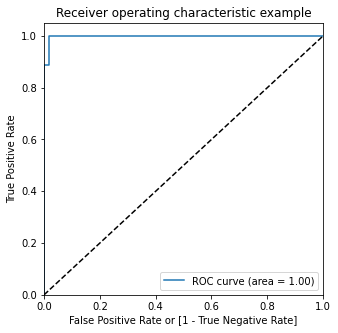

In [146]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# KNN with Oversampling

In [147]:
from sklearn.model_selection import KFold 

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=k),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

In [153]:
# Instantiating the model with best C
knn_model = KNeighborsClassifier(n_neighbors=13)

# Fitting the model on train dataset
knn_model.fit(X_over, y_over)

KNeighborsClassifier(n_neighbors=13)

In [154]:
# Predictions on the train set
y_train_pred = knn_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.97%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



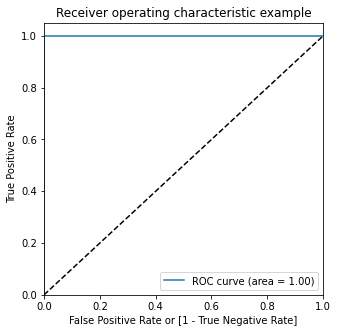

In [155]:
# Predicted probability
y_train_pred_proba = knn_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [156]:
y_pred = knn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



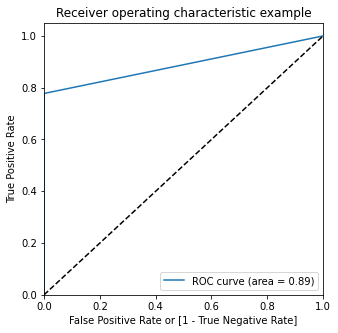

In [157]:
# Predicted probability
y_test_pred_proba = knn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Print the class distribution after applying SMOTE 

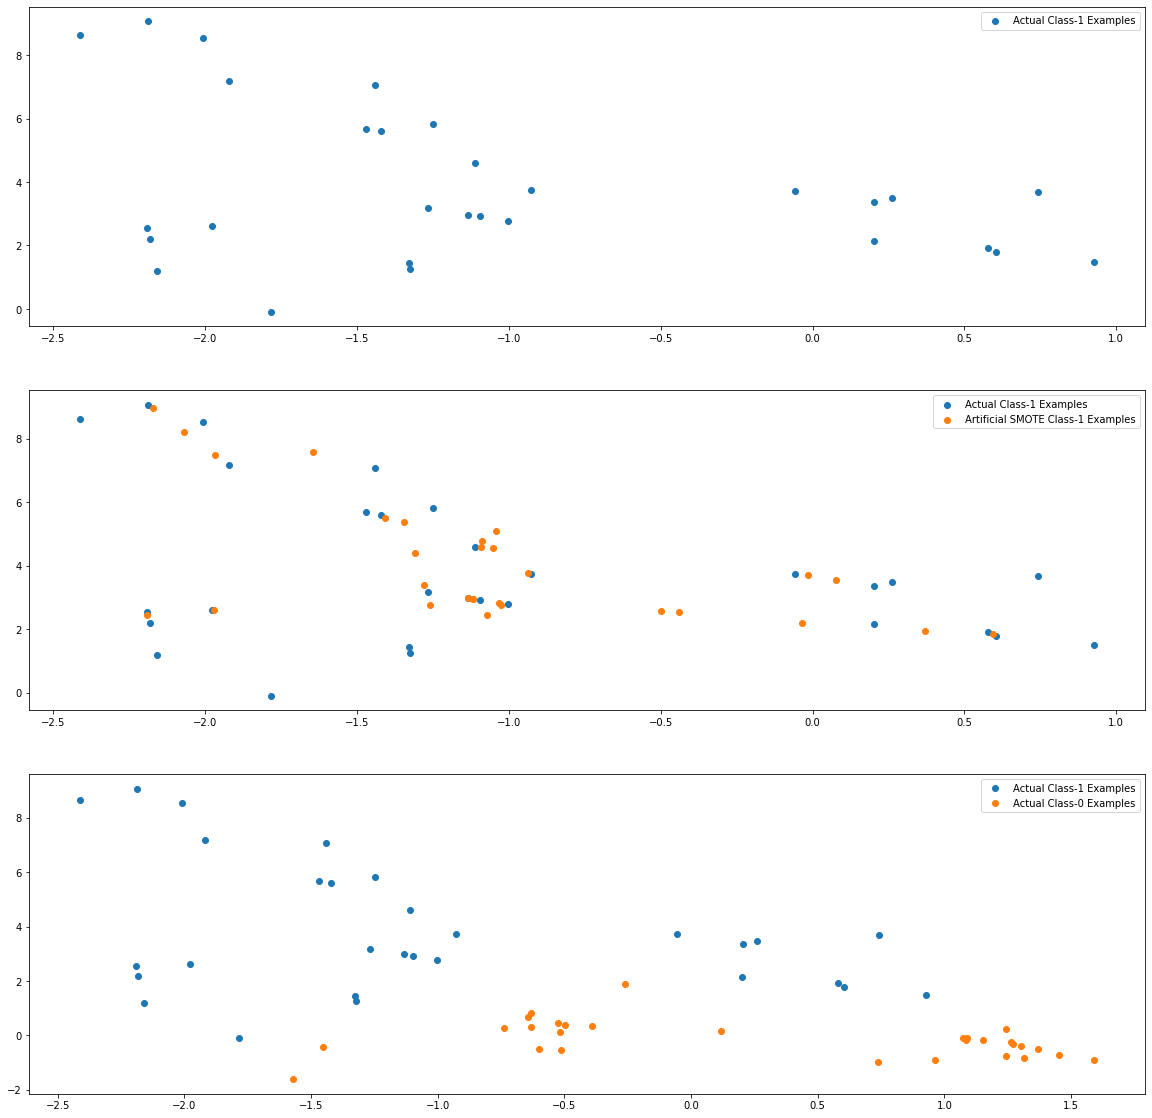

In [162]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


# Logistic Regression with SMOTE

In [163]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  1.0
Best hyperparameters:  {'C': 0.01}


In [164]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.134677,0.026222,0.011366,0.004822,0.01,{'C': 0.01},1.0,1.0,1.0,1.000000,...,1.000000,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
1,0.140097,0.022243,0.010711,0.002546,0.1,{'C': 0.1},1.0,1.0,1.0,1.000000,...,1.000000,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
2,0.215578,0.035450,0.010532,0.002993,1,{'C': 1},1.0,1.0,1.0,0.999773,...,0.999955,0.000091,3,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
3,0.291289,0.031400,0.008703,0.002965,10,{'C': 10},1.0,1.0,1.0,0.999683,...,0.999937,0.000127,4,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
4,0.315238,0.059629,0.013023,0.005439,100,{'C': 100},1.0,1.0,1.0,0.999634,...,0.999927,0.000147,5,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
5,0.261696,0.024354,0.009845,0.002907,1000,{'C': 1000},1.0,1.0,1.0,0.999611,...,0.999922,0.000155,6,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00


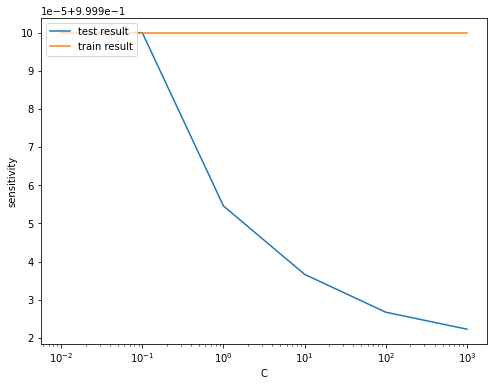

In [165]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [166]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

In [167]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



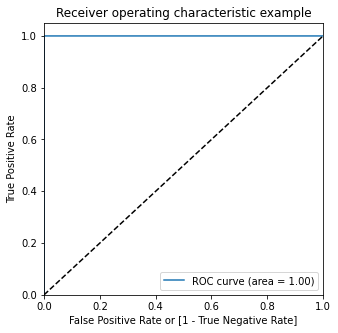

In [168]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

In [169]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



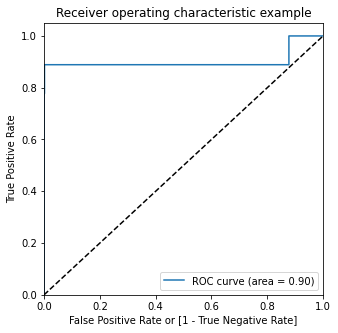

In [170]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

# Model summary
Train set

F1-score : 100% ROC curve : 1

Test set

F1-score : 87.5% ROC curve : 1

# Decision Tree with SMOTE

In [171]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [172]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9998901028754611
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [173]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [174]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [175]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 99.84%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



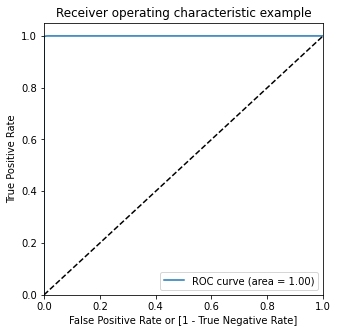

In [176]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [177]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 94.12%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.89      0.94         9

    accuracy                           1.00      1993
   macro avg       1.00      0.94      0.97      1993
weighted avg       1.00      1.00      1.00      1993



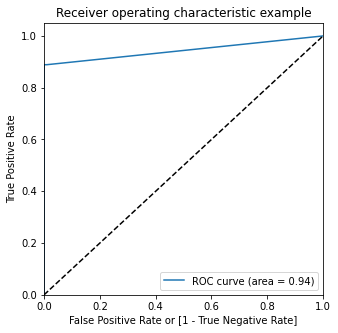

In [178]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

# Model summary
Train set

F1-score : 99.84% ROC curve : 1

Test set

F1-score : 94.12% ROC curve : .94

# XGBoost with SMOTE

In [179]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions= param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [180]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.735882,0.018002,0.018553,0.000335,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",1.0,1.0,1.000000,1.0,1.345091e-07,4,1.0,1.0,1.0,1.0,6.409876e-17
1,2.168158,0.025495,0.023750,0.007278,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",1.0,1.0,1.000000,1.0,0.000000e+00,1,1.0,1.0,1.0,1.0,0.000000e+00
2,2.114259,0.092958,0.018453,0.000193,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",1.0,1.0,1.000000,1.0,6.725457e-08,2,1.0,1.0,1.0,1.0,0.000000e+00
3,1.508539,0.043027,0.016590,0.000396,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",1.0,1.0,1.000000,1.0,1.344583e-07,3,1.0,1.0,1.0,1.0,1.681364e-08
4,1.813912,0.015290,0.016882,0.000356,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",1.0,1.0,0.999999,1.0,3.362729e-07,5,1.0,1.0,1.0,1.0,0.000000e+00
5,1.574431,0.245768,0.014492,0.002678,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",1.0,1.0,0.999999,1.0,4.707820e-07,6,1.0,1.0,1.0,1.0,0.000000e+00


In [183]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  1.0
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.6)


In [182]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [185]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

In [186]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



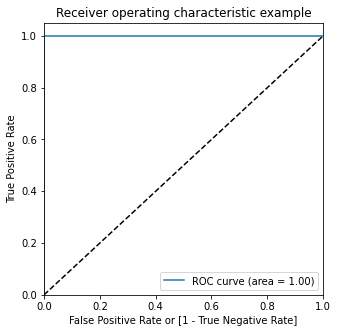

In [187]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [188]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



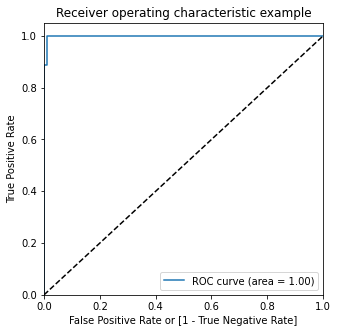

In [189]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 100% ROC curve : 1

Test set

F1-score : 87.5% ROC curve : 1

# KNN with SMOTE

In [190]:
from sklearn.model_selection import KFold 

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=k),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

In [191]:
# Instantiating the model with best C
knn_model = KNeighborsClassifier(n_neighbors=13)

# Fitting the model on train dataset
knn_model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=13)

In [192]:
# Predictions on the train set
y_train_pred = knn_model.predict(X_train_smote)

In [193]:
# Predicted probability
y_train_pred_proba = knn_model.predict_proba(X_train_smote)[:,1]

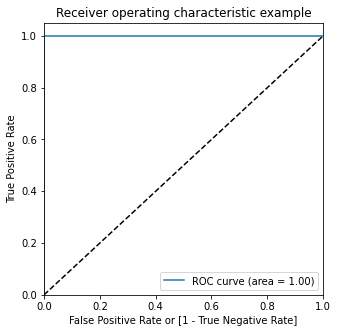

In [194]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [195]:
# Making prediction on the test set
y_test_pred = knn_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



In [196]:
# Predicted probability
y_test_pred_proba = knn_model.predict_proba(X_test)[:,1]

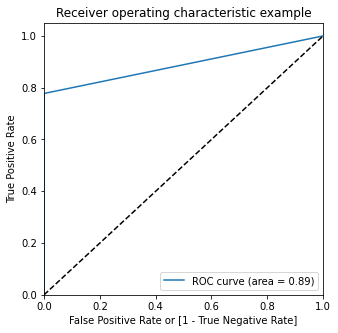

In [197]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 99.97% ROC curve : 1

Test set

F1-score : 87.5% ROC curve : .89

### Print the class distribution after applying ADASYN

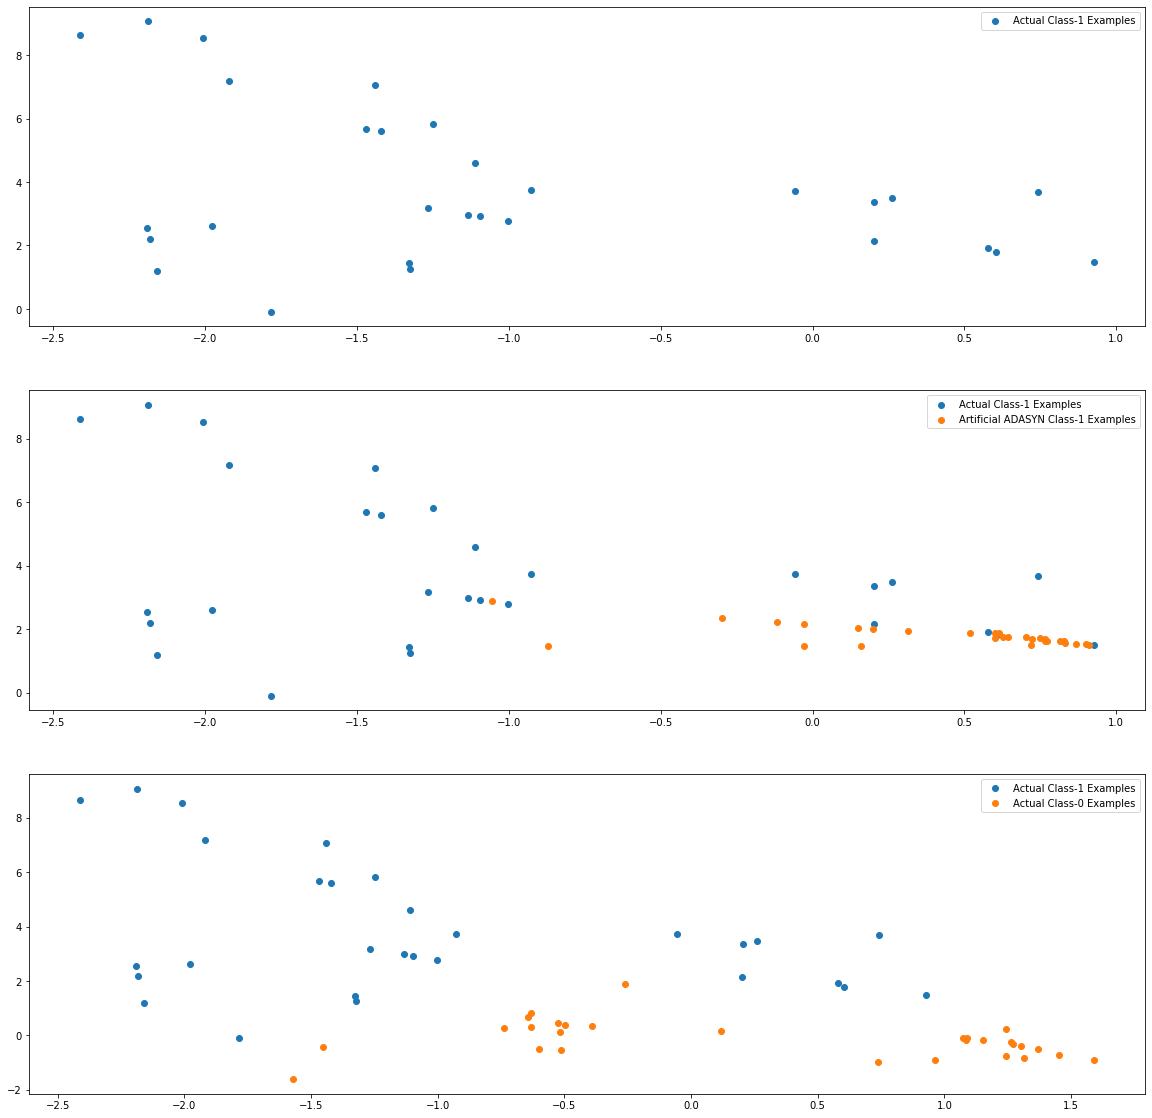

In [206]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


# Logistic Regression with ADASYN

In [207]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  1.0
Best hyperparameters:  {'C': 0.01}


In [208]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.058073,0.005276,0.009442,0.002974,0.01,{'C': 0.01},1.0,1.000000,1.0,1.000000,0.000000,1,1.0,1.0,1.0,1.0,0.000000e+00
1,0.063971,0.005354,0.007141,0.000374,0.1,{'C': 0.1},1.0,1.000000,1.0,1.000000,0.000000,1,1.0,1.0,1.0,1.0,6.409876e-17
2,0.091515,0.010521,0.006458,0.000030,1,{'C': 1},1.0,0.999697,1.0,0.999899,0.000143,3,1.0,1.0,1.0,1.0,0.000000e+00
3,0.113983,0.013533,0.006700,0.000363,10,{'C': 10},1.0,0.999655,1.0,0.999885,0.000163,4,1.0,1.0,1.0,1.0,0.000000e+00
4,0.114544,0.020424,0.006479,0.000022,100,{'C': 100},1.0,0.999643,1.0,0.999881,0.000168,5,1.0,1.0,1.0,1.0,0.000000e+00
5,0.116276,0.031656,0.006513,0.000052,1000,{'C': 1000},1.0,0.999637,1.0,0.999879,0.000171,6,1.0,1.0,1.0,1.0,0.000000e+00


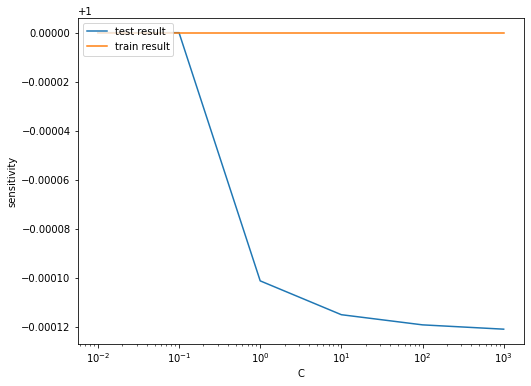

In [209]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [210]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [212]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



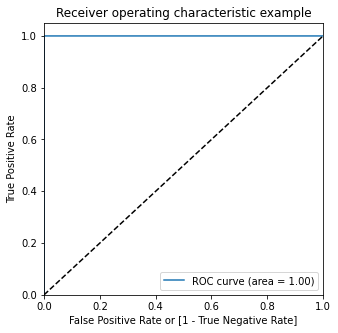

In [213]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [214]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



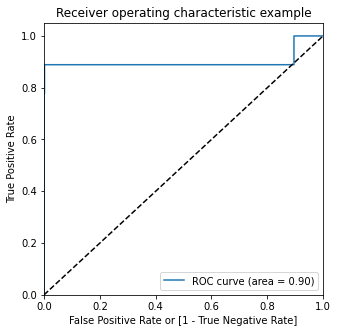

In [215]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 100% ROC curve : 1

Test set

F1-score : 87.9% ROC curve : .90

# Decision Tree with ADASYN

In [216]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [217]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9997377065503025
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [218]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [219]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.96%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



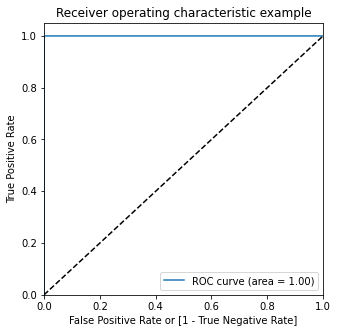

In [220]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [221]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 71.43%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.56      0.71         9

    accuracy                           1.00      1993
   macro avg       1.00      0.78      0.86      1993
weighted avg       1.00      1.00      1.00      1993



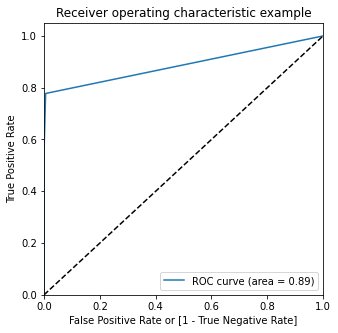

In [222]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 99.97% ROC curve : 1

Test set

F1-score : 87.5% ROC curve : .89

# XGBoost with ADASYN

In [223]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions= param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
                   param_distributions={'learning_rate': [0.2, 0.6],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [224]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.901781,0.189502,0.019229,0.000246,0.3,0.2,"{'subsample': 0.3, 'learning_rate': 0.2}",0.999998,1.0,1.0,0.999999,8.067501e-07,2,1.0,1.0,1.0,1.0,3.362094e-08
1,2.188864,0.032244,0.019310,0.000675,0.6,0.2,"{'subsample': 0.6, 'learning_rate': 0.2}",0.999998,1.0,1.0,0.999999,8.739793e-07,4,1.0,1.0,1.0,1.0,0.000000e+00
2,1.396744,0.096426,0.011695,0.000200,0.9,0.2,"{'subsample': 0.9, 'learning_rate': 0.2}",0.999998,1.0,1.0,0.999999,8.067501e-07,2,1.0,1.0,1.0,1.0,1.281975e-16
3,1.054552,0.013398,0.010321,0.000182,0.3,0.6,"{'subsample': 0.3, 'learning_rate': 0.6}",0.999995,1.0,1.0,0.999998,2.285792e-06,6,1.0,1.0,1.0,1.0,0.000000e+00
4,1.773629,0.093680,0.017795,0.000252,0.6,0.6,"{'subsample': 0.6, 'learning_rate': 0.6}",0.999997,1.0,1.0,0.999999,1.243740e-06,5,1.0,1.0,1.0,1.0,0.000000e+00
5,1.572194,0.265155,0.015924,0.002441,0.9,0.6,"{'subsample': 0.9, 'learning_rate': 0.6}",0.999998,1.0,1.0,0.999999,7.395209e-07,1,1.0,1.0,1.0,1.0,0.000000e+00


In [225]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999994770797395
XGBClassifier(learning_rate=0.6, max_depth=2, n_estimators=200, subsample=0.9)


In [226]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [227]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [228]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



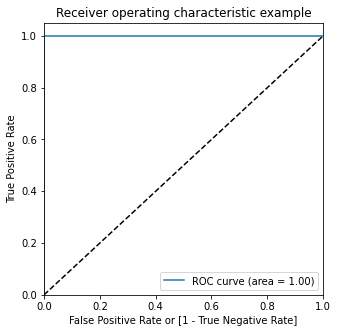

In [229]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [230]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



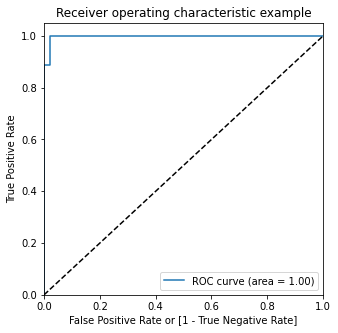

In [231]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 100% ROC curve : 1

Test set

F1-score : 87.9% ROC curve : 1

# KNN with ADASYN

In [232]:
# Fit a logistic regression model to our data
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=k),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

In [233]:
# Instantiating the model with best C
knn_model = KNeighborsClassifier(n_neighbors=13)

# Fitting the model on train dataset
knn_model.fit(X_train_adasyn, y_train_adasyn)

KNeighborsClassifier(n_neighbors=13)

In [236]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [234]:
# Predictions on the train set
y_train_pred = knn_model.predict(X_train_adasyn)

In [237]:
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.97%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7943
         1.0       1.00      1.00      1.00      7943

    accuracy                           1.00     15886
   macro avg       1.00      1.00      1.00     15886
weighted avg       1.00      1.00      1.00     15886



In [238]:
# Predicted probability
y_train_pred_proba = knn_model.predict_proba(X_train_adasyn)[:,1]

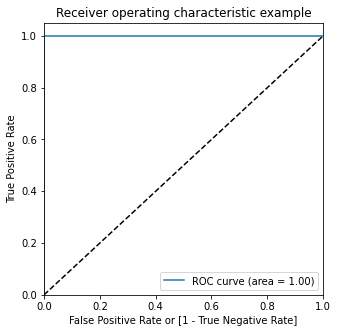

In [239]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [240]:
# Making prediction on the test set
y_test_pred = knn_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 87.5%
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



In [241]:
# Predicted probability
y_test_pred_proba = knn_model.predict_proba(X_test)[:,1]

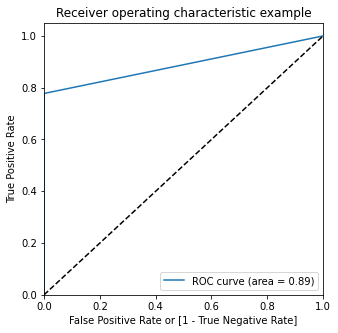

In [242]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# Model summary
Train set

F1-score : 99.97% ROC curve : 1

Test set

F1-score : 87.5% ROC curve : .89

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

In [243]:
clf = XGBClassifier(max_depth=2, n_estimators=200)  #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation score on the X_test by choosing the best evaluation metric
print("Training:"+str(clf.score(X_train_adasyn,y_train_adasyn)))
print("Test:"+str(clf.score(X_test,y_test)))
pred = clf.predict(X_test)

Training:1.0
Test:0.9989964877069744


### Print the important features of the best model to understand the dataset

Top var = 17
2nd Top var = 14
3rd Top var = 4


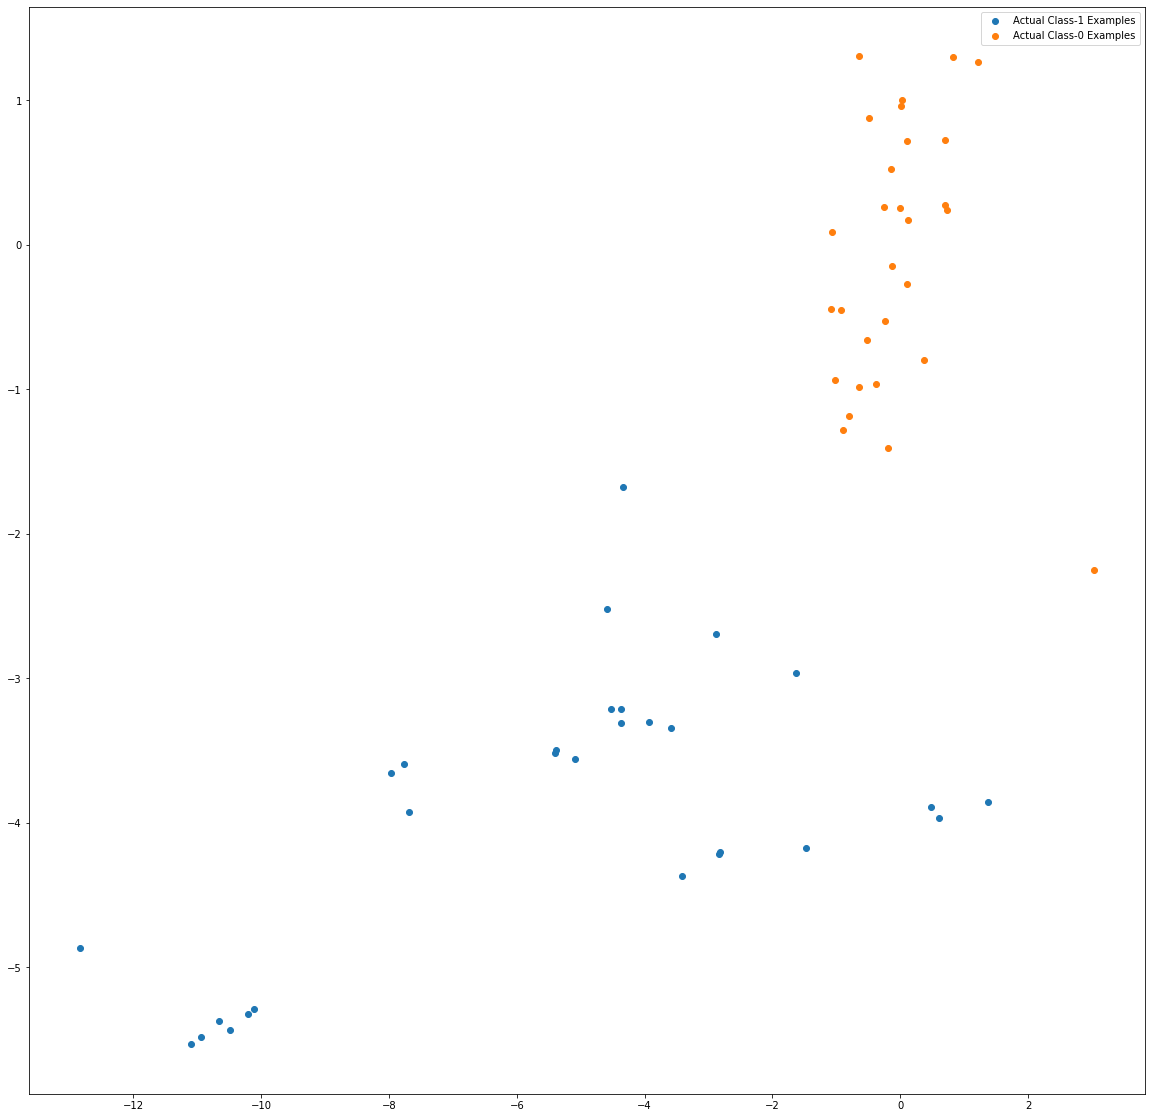

In [244]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [246]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
1.0


After performing several models, we have seen that in the balanced dataset with ADASYN technique the XGBoost model has good ROC score(100%) and also high Recall(86%). Hence, we can go with the XGBoost model for this project. We also see that the best Baleacing technique is ADASYN as it gives us the best threshold. 

It is also impotant to note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. Choose an appropriate evaluation metric which reflects this business goal with is why we use F1 and ROC cure as model prefomance indicators insted of Accuracy.